In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.DataFrame({'Name of company': ['Fuoye Pure Water', 'De-cork', 'Aquafina', 'Ollan', 'Pama', 'Eva', 'Bigi', 'Gossy'], 'Number of Pure Water': [20, 20, 20, 20, 18, 16, 20, 20], 'Leakages': [1, 1, 2, 3, 2, 1, 2, 1]})

In [23]:
data.reset_index(drop = True, inplace = True)

In [24]:
data

,Name of company,Number of Pure Water,Leakages
0,Fuoye Pure Water,20,1
1,De-cork,20,1
2,Aquafina,20,2
3,Ollan,20,3
4,Pama,18,2
5,Eva,16,1
6,Bigi,20,2
7,Gossy,20,1


In [20]:
data['Probability'] = round(data['Leakages'] / data['Number of Pure Water'], 2)

TypeError: 'NoneType' object is not subscriptable

In [4]:
control_line = round(np.mean(data['Probability']), 3)
highest = np.max(data['Number of Pure Water'])
control_line, highest

(0.084, 20)

In [5]:
lower_limit =  round(control_line - (3 * sqrt(control_line * (1-control_line) / highest)), 3)
if lower_limit < 0:
    lower_limit = 0
else:
    lower_limit

In [6]:
upper_limit = round(control_line + (3 * sqrt(control_line * (1-control_line) / highest)), 3)
if upper_limit > 1:
    upper_limit = 0
else:
        upper_limit

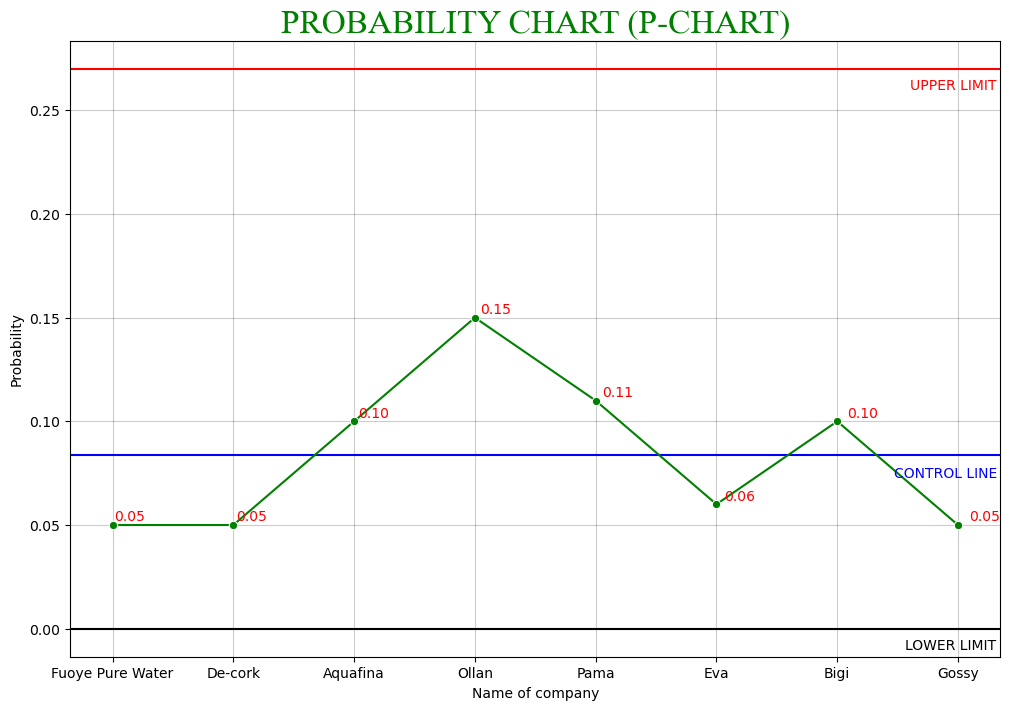

In [31]:
#plt.annotate('Upper limit', x = upper_limit, y = upper_limit, xy = (1, 1), color = 'red')
plt.figure(figsize=(12, 8))
plt.axhline(upper_limit, color = 'red')
plt.annotate(xy=(6.6, 0.26), text = 'UPPER LIMIT', color = 'red')
plt.axhline(control_line, color = 'blue')
plt.annotate(xy=(6.47, 0.073), text = 'CONTROL LINE', color = 'blue')
plt.axhline(lower_limit, lower_limit, color = 'black')
plt.annotate(xy=(6.56, -0.01), text = 'LOWER LIMIT', color = 'black')
plt.grid(color = 'black', alpha = 0.2)
for i, txt in enumerate(data['Probability']):
    plt.annotate(f'{txt:.2f}',  (i+0.01, txt+ 0.002), textcoords= 'offset points', color = 'red')

plt.title('PROBABILITY CHART (P-CHART)', color = 'green', fontsize = 24, fontname = 'TimeS New Roman')
sns.lineplot(  x = data['Name of company'], y= data['Probability'], color = 'green', marker= 'o').set_facecolor('white');
